<a href="https://colab.research.google.com/github/Gaukhar-ai/Thinkful_work/blob/master/Deep_Learning_Day_2_Morning_Lecture_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
def relu(x):
  if x > 0:
    return x
  else:
    return 0

In [3]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [4]:
x = np.linspace(-5,5,101)
y = [relu(z) for z in x]

df = pd.DataFrame({'x':x, 'y': y})
df

,x,y
0,-5.0,0.0
1,-4.9,0.0
2,-4.8,0.0
3,-4.7,0.0
4,-4.6,0.0
...,...,...
96,4.6,4.6
97,4.7,4.7
98,4.8,4.8
99,4.9,4.9


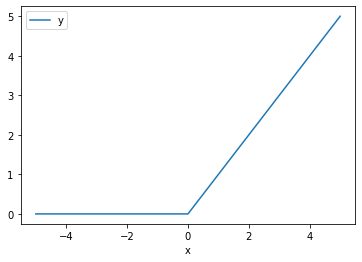

In [5]:
df.plot(x='x', y='y')

In [6]:
x = np.linspace(-5,5,101)
y = [sigmoid(z) for z in x]

df = pd.DataFrame({'x':x, 'y': y})
df

,x,y
0,-5.0,0.006693
1,-4.9,0.007392
2,-4.8,0.008163
3,-4.7,0.009013
4,-4.6,0.009952
...,...,...
96,4.6,0.990048
97,4.7,0.990987
98,4.8,0.991837
99,4.9,0.992608


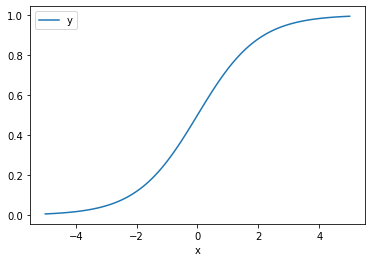

In [7]:
df.plot(x='x', y='y')

In [8]:
def leaky_relu(x):
  if x > 0:
    return x
  else:
    return 0.01 * x

In [9]:
x = np.linspace(-5,5,101)
y = [leaky_relu(z) for z in x]

df = pd.DataFrame({'x':x, 'y': y})
df

,x,y
0,-5.0,-0.050
1,-4.9,-0.049
2,-4.8,-0.048
3,-4.7,-0.047
4,-4.6,-0.046
...,...,...
96,4.6,4.600
97,4.7,4.700
98,4.8,4.800
99,4.9,4.900


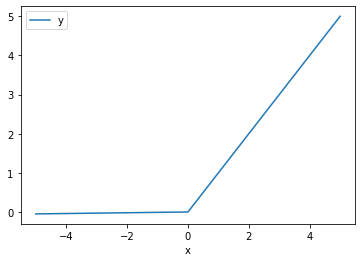

In [10]:
df.plot(x='x', y='y')

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Age -  ranges from 18 to 40  
# Delivery number - ranges from 1 to 4
# Delivery time -  {0 = timely , 1 = premature , 2 = latecomer}
# Blood of Pressure - {0 = low , 1 = normal , 2 = high }
# Heart Problem - {0 = apt, 1 = inept }
# Target - Caesarian - {0 = No, 1 = Yes }

csection = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv')

In [12]:
csection.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [13]:
csection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              80 non-null     int64
 1   Delivery number  80 non-null     int64
 2   Delivery time    80 non-null     int64
 3   Blood Pressure   80 non-null     int64
 4   Heart Problem    80 non-null     int64
 5   Caesarian        80 non-null     int64
dtypes: int64(6)
memory usage: 3.9 KB


In [14]:
c_dummy = pd.get_dummies(csection, columns=['Delivery number', 'Delivery time', 'Heart Problem'], drop_first=True)

x = c_dummy.drop(columns=['Caesarian'])
y = c_dummy['Caesarian']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
X_train.shape[1]

8

In [18]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='tanh'))


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50)

Epoch 1/1000
2/2 [==============================] - 0s 89ms/step - loss: 1.5167 - accuracy: 0.5625 - val_loss: 0.9206 - val_accuracy: 0.6250
Epoch 2/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.9476 - accuracy: 0.5625 - val_loss: 1.0707 - val_accuracy: 0.2500
Epoch 3/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.1289 - accuracy: 0.4688 - val_loss: 2.2256 - val_accuracy: 0.2500
Epoch 4/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.4718 - accuracy: 0.4688 - val_loss: 0.8869 - val_accuracy: 0.3750
Epoch 5/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.8314 - accuracy: 0.4375 - val_loss: 0.8607 - val_accuracy: 0.6250
Epoch 6/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.9524 - accuracy: 0.5625 - val_loss: 0.9369 - val_accuracy: 0.6250
Epoch 7/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.0644 - accuracy: 0.5625 - val_loss: 0.9886 - val_accuracy: 0.6250
Epoch 8/1000
2/2 

In [22]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50)

RuntimeError: ignored